# Clustering Assignment

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset 

cntry_df=pd.read_csv("Country-data.csv",encoding='utf-8',engine='python')

cntry_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Understanding the data 

In [3]:
# Check the datatype of the columns

cntry_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
cntry_df.shape

(167, 10)

**As we can see that all columns are numericals except for one column - 'country'**

## Data Preparation

**Cleaning/Handling missing values from the dataset**

In [5]:
# Cheecking for missing values

cntry_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**No missing values, hence we can proceed with our next step for data analysis**

In [6]:
#checking for duplicates
cntry_df.duplicated(subset = ['country'], keep = False).sum()

0

In [7]:
#checking if any columns having unique value ie only 1 value
unique =cntry_df.nunique()
unique = unique[unique.values ==1]
unique

Series([], dtype: int64)

**No Unique Value present**

## Data Transformation

In [8]:
# Remove the non-numerical column i.e. 'Country'

cntry_df.set_index('country',inplace=True)
cntry_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**Changing the column 'health', 'imports' and 'exports' percentage of Total GDP into 'health', 'imports' and 'exports' percentage of total gdpp for making dataset complete sense.**

In [9]:
# Now changing per Total GDP to per Total GDPP

cntry_df['health']=(cntry_df['health']*cntry_df['gdpp'])/100
cntry_df['imports']=(cntry_df['imports']*cntry_df['gdpp'])/100
cntry_df['income']=(cntry_df['income']*cntry_df['gdpp'])/100
cntry_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200


## Data Visualisation

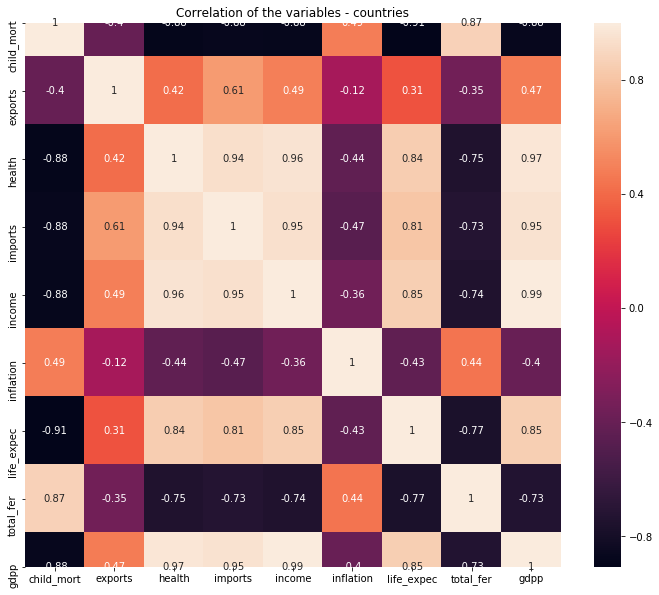

In [10]:
# Plotting heat map to see the correlation of the dataset

# setting figure size and inline

%matplotlib inline 
plt.figure(figsize=(12,10))

# setting title

plt.title("Correlation of the variables - countries")

# Heatmap plotting

sns.heatmap(cntry_df.corr(method='spearman'),annot=True)   # Method is used 'spearman' for monotonic

plt.show()   # Now showing

**From the above heatmap, we can see that there are some variables having very high correlation with repect to postive and negative.**

### Rescaling the dataset 

In [11]:
# Importing the scaling library - StandardScaler

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()



In [12]:
# Scaling the dataset with Standard Scaler 

scaled_df=scaler.fit_transform(cntry_df)
scaled_df=pd.DataFrame(scaled_df,columns=cntry_df.columns)

scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,-0.565040,-0.432276,-0.419624,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.439218,-0.313677,-0.388521,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.484826,-0.353720,-0.375272,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-0.532363,-0.345953,-0.404013,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.178771,0.040735,-0.237868,-0.601749,0.704258,-0.541946,-0.041817


## Outliers Analysis

In [13]:
round(scaled_df.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)   # creating percentile to check outliers

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.89,-1.50,-0.58,-0.45,-0.42,-1.14,-4.34,-1.19,-0.70
15%,-0.83,-0.80,-0.56,-0.43,-0.42,-0.64,-1.15,-0.93,-0.67
35%,-0.66,-0.48,-0.51,-0.37,-0.41,-0.46,-0.23,-0.64,-0.55
50%,-0.47,-0.22,-0.41,-0.31,-0.38,-0.23,0.29,-0.36,-0.45
55%,-0.35,-0.10,-0.38,-0.29,-0.37,-0.17,0.38,-0.23,-0.38
75%,0.59,0.37,-0.04,0.08,-0.18,0.28,0.70,0.62,0.06
95%,1.93,1.44,2.18,1.20,1.43,1.24,1.22,1.93,1.95


**As we can see from the above table, all columns are having outliers.**

**Let's now visualize the dataset to understand the outliers in better way. We will create boxplots for each one of them**

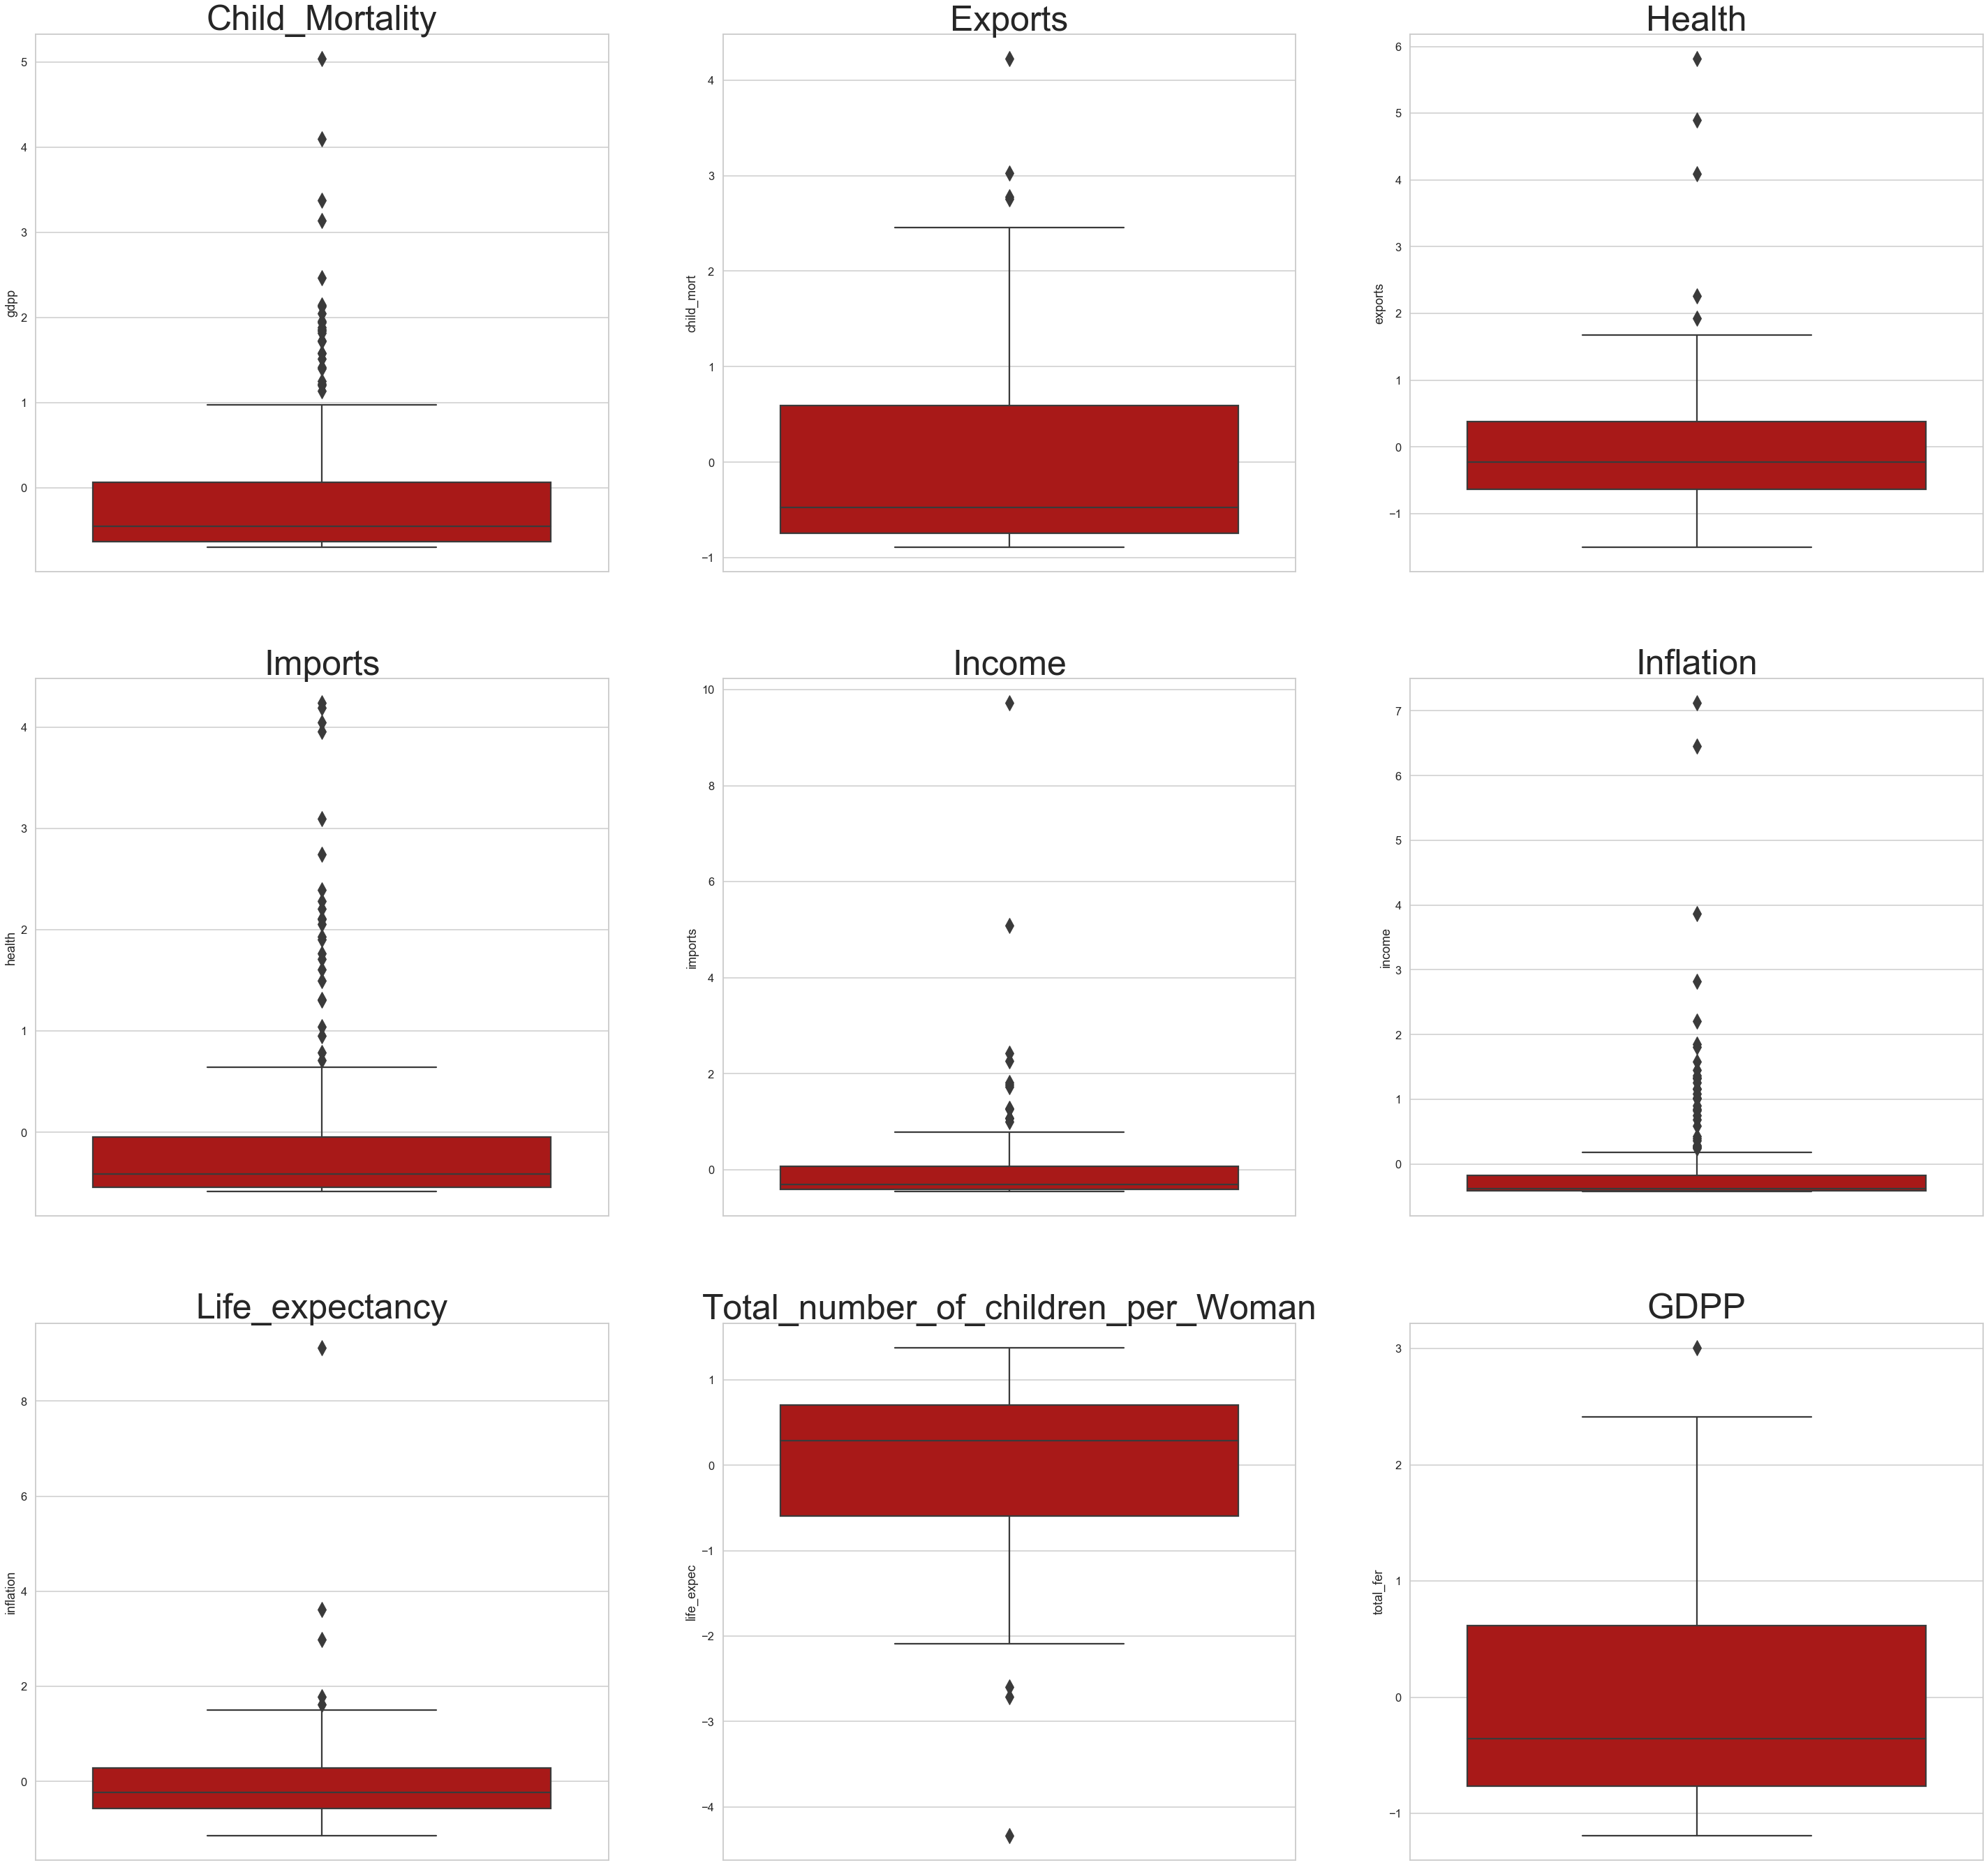

In [14]:

# Setting size of figure, context and gridlines

plt.figure(figsize=(50,150))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

# Title names for the columns in the dataset

col={0:'Child_Mortality',1:'Exports',2:'Health',3:'Imports',4:'Income',5:'Inflation',
     6:'Life_expectancy',7:'Total_number_of_children_per_Woman',8:'GDPP'}

# Visualising the outliers with boxplot for all the variables 

for i in range(9):
    plt.subplot(9,3,i+1)
    plt.title(col[i],fontsize=50)
    sns.boxplot(x=scaled_df.columns[i-1],data=scaled_df,palette='gist_heat',orient='v',fliersize=15)  # using boxplot
        

**From the above boxplot, we can conclude that all the variables/components are having outliers. So, from here we can make a decision that either to keep the outliers or to remove them.**

We will use both approach and compare both of the results :

- First, we will include outliers and do clustering 
- Second, we will trim the outliers and do clustering


# Approach 1 : Include Outliers

#### Hopkins Statistics:

In [15]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [34]:
hopkins(scaled_df)

0.8965113069483195

Since the value is > 0.7 the given dataset has a good tendency to form clusters.

In [68]:
# importing clustering libraries

import sklearn

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

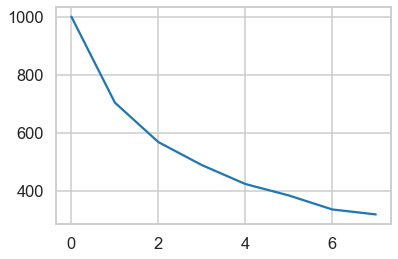

In [35]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2,3,4,5,6,7,8,9]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

## Silhouette Analysis

In [19]:
# Silhouette analysis


clusters_range=[2,3,4,5,6,7,8,9]                                        # selecting range of clusters
for i in clusters_range:                                                # For loop
    kmeans=KMeans(n_clusters=i,max_iter=500)                            # Using iteration 500 for finding Kmeans
    kmeans.fit(scaled_df)                                               # fitting the kmeans
    cluster_label=kmeans.labels_                                        # saving the labels in a cluster_label list
    
    silhouette_Score=silhouette_score(scaled_df,cluster_label)          # finding the silhouette score 
    
    # Printing for all number of clusters of range(2,10) for silhouette score
    
    print("For no. of cluster={0},silhouette score is {1}".format(i,silhouette_Score))    


For no. of cluster=2,silhouette score is 0.423670178948397
For no. of cluster=3,silhouette score is 0.38878163766741886
For no. of cluster=4,silhouette score is 0.3916378550223242
For no. of cluster=5,silhouette score is 0.3979988500650777
For no. of cluster=6,silhouette score is 0.2523402884892992
For no. of cluster=7,silhouette score is 0.27027103793233515
For no. of cluster=8,silhouette score is 0.2887388448153484
For no. of cluster=9,silhouette score is 0.233468434373146


we will our final model k=4 to use for K-Means clustering as it is appropriate for analysis.

In [20]:
# Final model k=4

kmeans=KMeans(n_clusters=4,max_iter=500,random_state=42)         # k=4 and iteration=500
kmeans.fit(scaled_df)                                            # fitting the dataset

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [21]:
# New dataset cluster labels

kmeans.labels_ 

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 3, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 3, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [22]:
# Uploading the cluster labels in our original dataset

cntry_df['Cluster_id']=kmeans.labels_
cntry_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id
country,,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,2
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,2
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,0


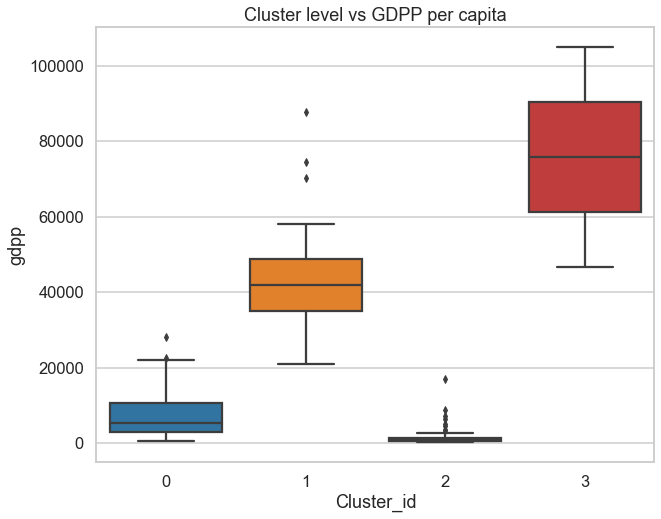

In [23]:
# Visualising the distribution of the cluster labels for column 'gdpp'

plt.figure(figsize=(10,8))
plt.title('Cluster level vs GDPP per capita')
sns.boxplot(x='Cluster_id',y='gdpp',data=cntry_df)

Points to be concluded from above boxplot - gdpp(The GDP per capita) visualization
- Cluster label 0 : Most of the countries in this boxplot are having little high gdpp than the very lowest gdpp group
- Cluster label 1 : Having high gdpp with some outliers 
- Cluster label 2 : Having **very low gdpp** than all the other cluster labels
- Cluster label 3 : Having **highest gdpp** than all other cluster labels


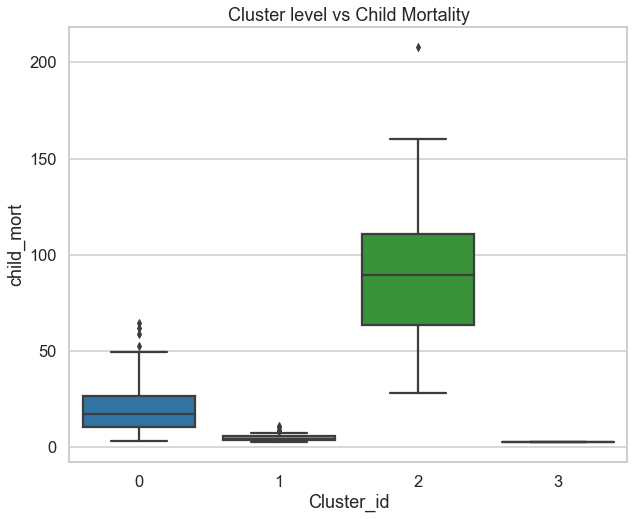

In [24]:
# Visualising the distribution of the cluster labels for column 'child_mort' using boxplot

plt.figure(figsize=(10,8))                    # setting figure size
plt.title('Cluster level vs Child Mortality') # Setting the title

sns.boxplot(x='Cluster_id',y='child_mort',data=cntry_df)  # Using boxplot

Points to be concluded from above boxplot - child_mort(Death of children under 5 years of age per 1000 live births) visualization
- Cluster label 0 : Having second highest child mortality with few outliers
- Cluster label 1 : Having low child mortality with few outliers
- Cluster label 2 : Having **highest child mortality** than rest of the cluster labels
- Cluster label 3 : Having **lowest child mortality** than all other cluster labels


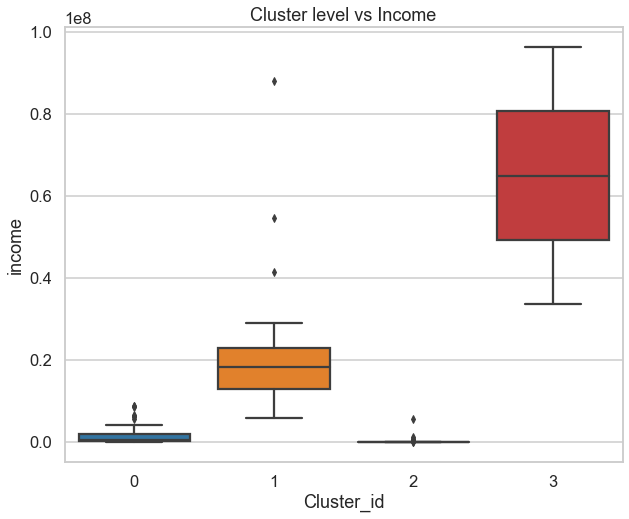

In [25]:
# Visualising the distribution of the cluster labels for column 'income'

plt.figure(figsize=(10,8))
plt.title('Cluster level vs Income')
sns.boxplot(x='Cluster_id',y='income',data=cntry_df)

Points to be concluded from above boxplot - income(Net income per person) visualization
- Cluster label 0 : Having second lowest income with few outliers
- Cluster label 1 : Having decent income with few outliers
- Cluster label 2 : Having **lowest income** with few outliers than rest of the cluster labels
- Cluster label 3 : Having **highest income** than all other cluster labels


In [36]:
cntry_df.Cluster_id.value_counts()

0    88
2    48
1    29
3     2
Name: Cluster_id, dtype: int64

There are total 48 countries from the dataset need of urgent help/aid as they are having lowest income, high child mortality and low gdp per capita.

**Let's Find the countries with highest income, low child mortality and high gdp per capita or the countries that doesn't need aid.**

Only 2 countries is there with good socio-economic and health factors

## Hierarchical Clustering

In [37]:
# Dropping the old cluster label and saving in new datset

hier_cluster=cntry_df.drop('Cluster_id',1)
hier_cluster.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200


In [38]:
# Importing the scaling library - StandardScaler

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [39]:
# Scaling the dataset with Standard Scaler 

scaled_hierdf=scaler.fit_transform(hier_cluster)
scaled_hierdf=pd.DataFrame(scaled_hierdf,columns=hier_cluster.columns)

scaled_hierdf.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,-0.565040,-0.432276,-0.419624,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.439218,-0.313677,-0.388521,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.484826,-0.353720,-0.375272,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-0.532363,-0.345953,-0.404013,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.178771,0.040735,-0.237868,-0.601749,0.704258,-0.541946,-0.041817


In [40]:
# Importing labraries for hierarchical clustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


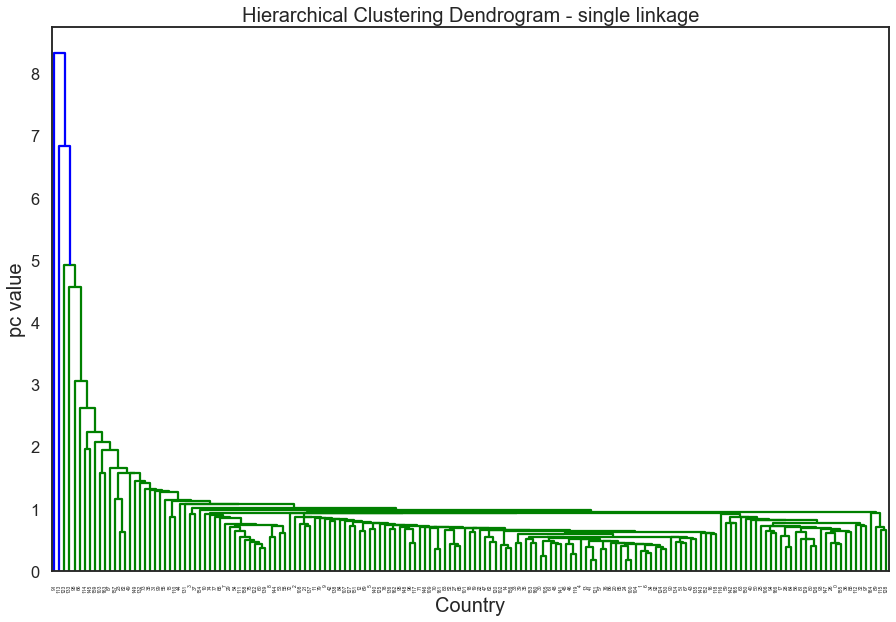

In [41]:
# First we will try with single linkage

# setting the figure and graph style

plt.figure(figsize=(15,10))
sns.set_style('white')

# setting the labels on axes and title

plt.title('Hierarchical Clustering Dendrogram - single linkage',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('pc value',fontsize=20)

single_linkage=linkage(scaled_hierdf,method='single',metric='euclidean')     # single linkage
dendrogram(single_linkage,labels=scaled_hierdf.index)                        # creating dendrogram
plt.show()                                                                   # plot showing

It's not clearly visible in single linkage dendogram hence we will go for complete linkage which gives us proper results.

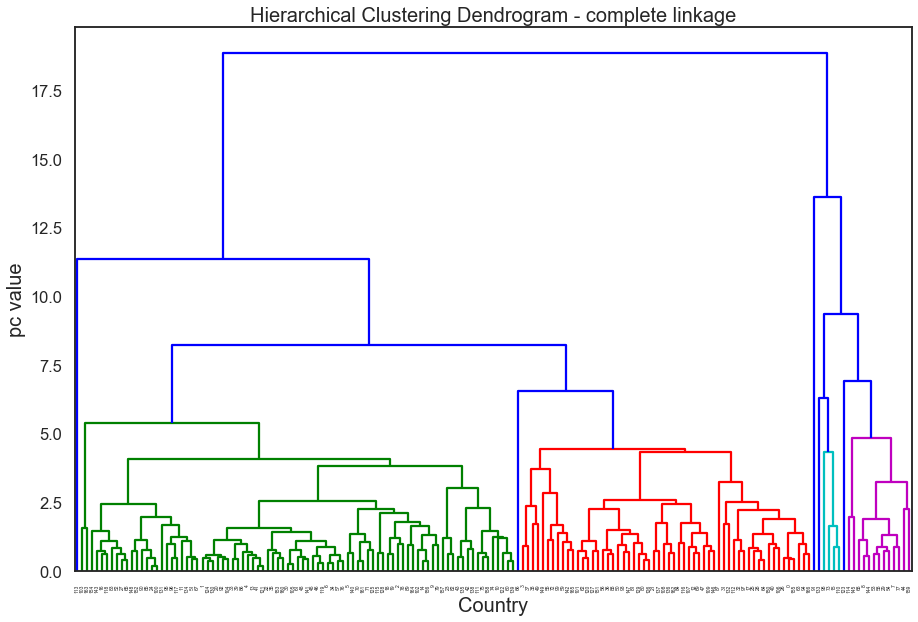

In [42]:
# Complete linkage

# setting the figure and graph style

plt.figure(figsize=(15,10))                                                                             # Setting the size of the figure
sns.set_style('white')                                                                                  # Setting style

# setting the labels on axes and title

plt.title('Hierarchical Clustering Dendrogram - complete linkage',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('pc value',fontsize=20)


complete_linkage=linkage(scaled_hierdf,method='complete',metric='euclidean')                             # single linkage
dendrogram(complete_linkage,above_threshold_color='blue',color_threshold=5.5,labels=scaled_hierdf.index) # creating dendrogram

plt.show()                                                                                              # plot showing

Taking reference from the above dendrogram we will cut in 3 clusters

In [43]:
# Applying 3 clusters

cluster_label=cut_tree(complete_linkage,n_clusters=3).reshape(-1, )  # using cut_tree for selecting number of clusters

cluster_label

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [44]:
# Asssigning the cluster labels to the dataset

scaled_hierdf['Cluster_label']=cluster_label

scaled_hierdf.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_label
0,1.291532,-1.138280,-0.565040,-0.432276,-0.419624,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.479658,-0.439218,-0.313677,-0.388521,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.099122,-0.484826,-0.353720,-0.375272,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,0.775381,-0.532363,-0.345953,-0.404013,1.387054,-1.179234,2.128151,-0.516268,0
4,-0.695634,0.160668,-0.178771,0.040735,-0.237868,-0.601749,0.704258,-0.541946,-0.041817,0


In [46]:
# Analysing cluster by comparing [gdpp,child_mort and income] - how they vary in hierarchical clustering 

cntry_df_hier=cntry_df.drop('Cluster_id',1)    # creating separate dataset for hierarchical cluster analysis

# Imputing the new hierarchical clusters in the dataset

cntry_df_hier['Cluster_level']=cluster_label

cntry_df_hier.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_level
country,,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,0
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,0


### Visualization of original variables(Child mortality, Income and Gdpp)

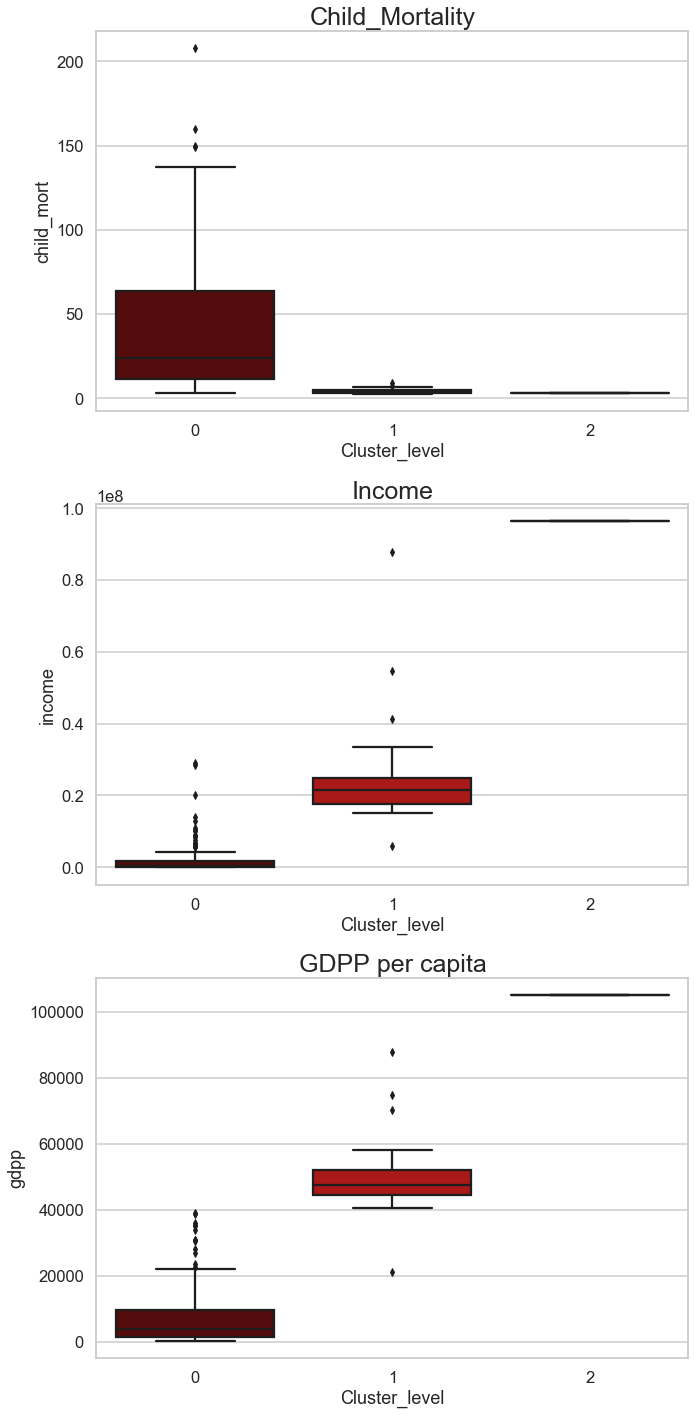

In [47]:

# Setting size of figure, context and gridlines

plt.figure(figsize=(10,20))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')


# Visualising the outliers with boxplot for child_mort, income and gdpp variables 



plt.subplot(3,1,1)                          # creating subplots
plt.title('Child_Mortality',fontsize=25)   # giving title with font size

# creating boxplot

sns.boxplot(x=cntry_df_hier['Cluster_level'],y=cntry_df_hier['child_mort'],data=cntry_df_hier,palette='gist_heat',orient='v',fliersize=5)

plt.subplot(3,1,2)                         # creating subplots
plt.title('Income',fontsize=25)            # giving title with font size

# creating boxplot
sns.boxplot(x=cntry_df_hier['Cluster_level'],y=cntry_df_hier['income'],data=cntry_df_hier,palette='gist_heat',orient='v',fliersize=5)

plt.subplot(3,1,3)                           # creating subplots
plt.title('GDPP per capita',fontsize=25)       # giving title with font size

# creating boxplot
sns.boxplot(x=cntry_df_hier['Cluster_level'],y=cntry_df_hier['gdpp'],data=cntry_df_hier,palette='gist_heat',orient='v',fliersize=5)
             
plt.tight_layout()                      # setting the layout for better visual
  

**Valuable Insights from above three boxplots :**

- For cluster 0: gdpp and income is the lowest than other clusters, Mortality of children is very high than other clusters.
- For cluster 1: Behaving normally in all departments(income, gdpp and children mortality) except for some outliers.
- For cluster 2: gdpp and income is higher than other clusters, Mortality of children is very less compared to other clusters.


In [52]:
cntry_df_hier.Cluster_level.value_counts()

0    147
1     19
2      1
Name: Cluster_level, dtype: int64

There are 147 countries found from the hierarchical analysis in need of urgent help/aid as it is having lowest income, high child mortality and low gdp per capita.

# Conclusion - Approach 1

## K-Means vs Hierarchical Clustering

**K-means clustering :**
- Countries that are direst need of aid
 - Total **48 countries** are in this category
- Countries that are having good socio-economic and health factors
 - Total 2 countries are in this category - Luxembourg and Singapore

**Hierarchical clustering :**
- Countries that are direst need of aid
 - Total **147 countries** are in this category
- Countries that are having good socio-economic and health factors
 - 1 country is in this category - Luxembourg

We have seen from both methods - **(K-Means and Hierarchical clustering)** that extra 99 countries are being selected from hierarchical clustering. I would choose the final countries from **k-means clustering** as it gave **accurate** output than hierarchical clustering. I have compared the clusters and visualized from both methods and K-means gave **precise** information than hierarchical clustering.

# Approach 2 : Exclude outliers

In [56]:
# Removing statistical ouliers from the dataset from all the columns

new_scaled_df=scaled_df

col=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

# using IQR method to remove the outliers

for i in range(len(col)):
    lower=new_scaled_df[col[i]].quantile(0.05)   # selecting lower quartile
    upper=new_scaled_df[col[i]].quantile(0.95)   # selecting higher quartile
    IQR=upper-lower                                 
    
    # storing new dataset with removed extreme outliers
    
    new_scaled_df=new_scaled_df[(new_scaled_df[col[i]] >=lower - 1.5*IQR) & (new_scaled_df[col[i]] <=upper + 1.5*IQR)]

#### Hopkins Statistics:

In [57]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [66]:
hopkins(new_scaled_df)

0.873959748109866

Since the value is > 0.7 the given dataset has a good tendency to form clusters.

In [67]:
# importing clustering libraries

import sklearn

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

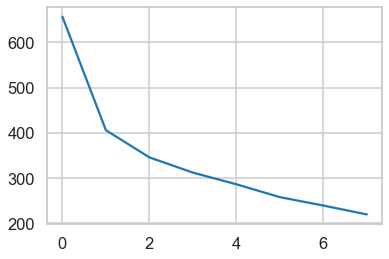

In [69]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2,3,4,5,6,7,8,9]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(new_scaled_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

## Silhouette Analysis

In [73]:
# Saving the old dataset in new dataset by reseting the index and removing the old cluster labels

cntry_df=cntry_df.reset_index()
new_cntry_df=cntry_df.iloc[new_scaled_df.index]

new_cntry_df=new_cntry_df.drop(['Cluster_id'],1)

In [74]:
# Silhouette analysis


clusters_range=[2,3,4,5,6,7,8,9]                                        # selecting range of clusters
for i in clusters_range:                                                # For loop
    kmeans=KMeans(n_clusters=i,max_iter=500)                            # Using iteration 500 for finding Kmeans
    kmeans.fit(new_scaled_df)                                               # fitting the kmeans
    cluster_label=kmeans.labels_                                        # saving the labels in a cluster_label list
    
    silhouette_Score=silhouette_score(new_scaled_df,cluster_label)          # finding the silhouette score 
    
    # Printing for all number of clusters of range(2,10) for silhouette score
    
    print("For no. of cluster={0},silhouette score is {1}".format(i,silhouette_Score))    


For no. of cluster=2,silhouette score is 0.3401496272870104
For no. of cluster=3,silhouette score is 0.4046100333281914
For no. of cluster=4,silhouette score is 0.29713475388703403
For no. of cluster=5,silhouette score is 0.2539095247336921
For no. of cluster=6,silhouette score is 0.2583195588592496
For no. of cluster=7,silhouette score is 0.25151591706610366
For no. of cluster=8,silhouette score is 0.2618849151863359
For no. of cluster=9,silhouette score is 0.25746283078967663


In [75]:
# Now, initiating k-means clustering

# Final model k=3

kmeans_2=KMeans(n_clusters=3,max_iter=500,random_state=42)         # k=3 and iteration=500
kmeans_2.fit(new_scaled_df)                          # fitting the dataset

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [76]:
# New dataset cluster labels

kmeans_2.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2,
       2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2,
       0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 0, 0])

In [77]:
# Uploading the cluster labels in our original dataset

new_cntry_df['Cluster_id']=kmeans_2.labels_
new_cntry_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id
0,Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,1


## Visualisation of original variables(gdpp, income and child_mort)

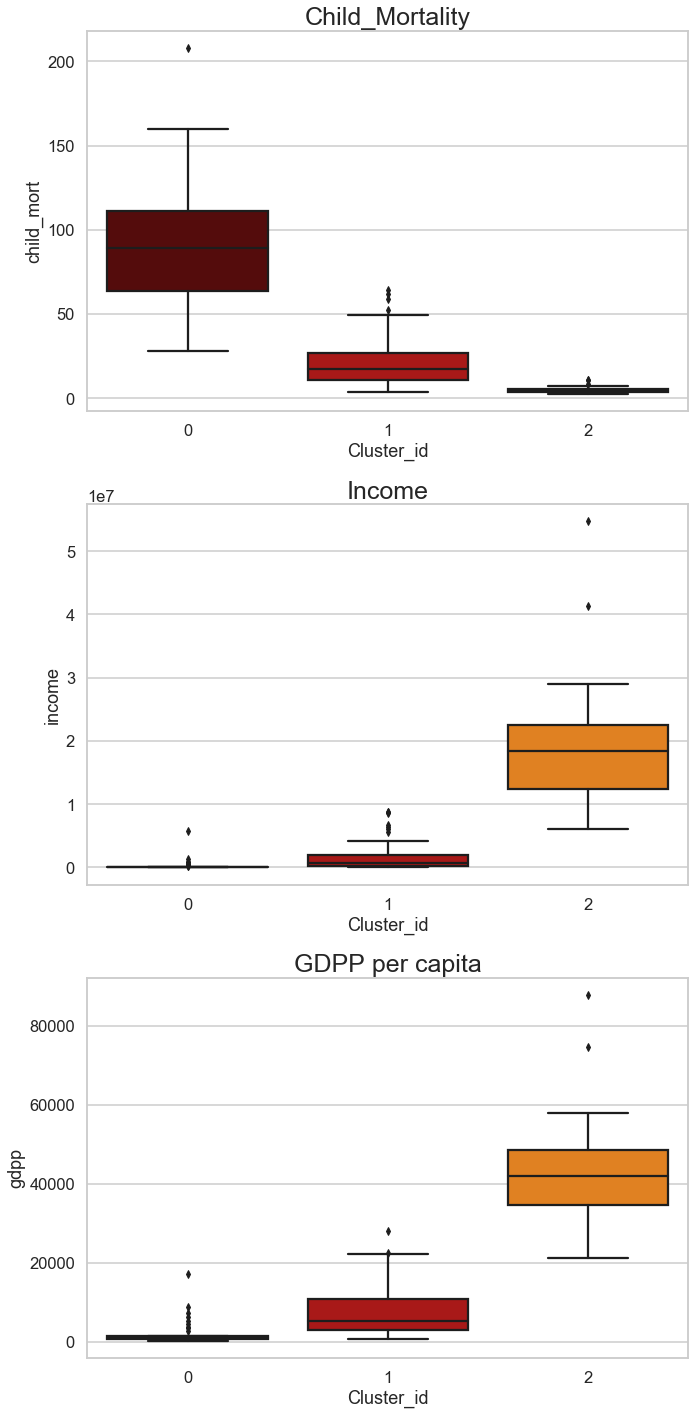

In [78]:

# Setting size of figure, context and gridlines

plt.figure(figsize=(10,20))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')


# Visualising with boxplot for child_mort, income and gdpp variables 



plt.subplot(3,1,1)                          # creating subplots
plt.title('Child_Mortality',fontsize=25)   # giving title with font size

# creating boxplot

sns.boxplot(x=new_cntry_df['Cluster_id'],y=new_cntry_df['child_mort'],data=new_cntry_df,palette='gist_heat',orient='v',fliersize=5)

plt.subplot(3,1,2)                         # creating subplots
plt.title('Income',fontsize=25)            # giving title with font size

# creating boxplot
sns.boxplot(x=new_cntry_df['Cluster_id'],y=new_cntry_df['income'],data=new_cntry_df,palette='gist_heat',orient='v',fliersize=5)

plt.subplot(3,1,3)                           # creating subplots
plt.title('GDPP per capita',fontsize=25)       # giving title with font size

# creating boxplot
sns.boxplot(x=new_cntry_df['Cluster_id'],y=new_cntry_df['gdpp'],data=new_cntry_df,palette='gist_heat',orient='v',fliersize=5)
             
plt.tight_layout()                      # setting the layout for better visual
  

**Valuable Insights from above three boxplots :**
- For cluster 0: gdpp and income is the lowest than other clusters, Mortality of children is very high than other clusters.
- For cluster 1: Having little higher gdpp and income than cluster 0 and child mortality more than cluster 2.
- For cluster 2: gdpp and income is higher than other clusters, Mortality of children is very less compared to other clusters.


## Insights (K-Means Approach 2)

In [84]:
new_cntry_df.Cluster_id.value_counts()

1    88
0    47
2    28
Name: Cluster_id, dtype: int64

There are total 47 countries from the dataset are in need of urgent help/aid as they are having lowest income, high child mortality and low gdp per capita.

There are **28 countries** having good socio-economic and health factors.

## Hierarchical Clustering

In [92]:
new_cntry_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id
0,Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,1


In [98]:
# Remove the non-numerical column i.e. 'Country'

new_cntry_df.set_index('country',inplace=True)
new_cntry_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id
country,,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,0
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,1
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,1
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,1


In [99]:
# Creating new dataset for hierarchical clustering by removing old cluster label

hier_cluster1=new_cntry_df.drop('Cluster_id',1)
hier_cluster1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200


In [100]:
# Importing the scaling library - StandardScaler

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [105]:
# Scaling the dataset with Standard Scaler 

scaled_hierdf_1=scaler.fit_transform(hier_cluster1)
scaled_hierdf_1=pd.DataFrame(scaled_hierdf_1,columns=hier_cluster1.columns)

scaled_hierdf_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.303466,-1.319031,-0.562023,-0.648685,-0.503298,0.289329,-1.612381,1.911315,-0.702455
1,-0.545781,-0.508144,-0.431204,-0.422310,-0.455173,-0.370665,0.666389,-0.870331,-0.483620
2,-0.276937,-0.039632,-0.478624,-0.498742,-0.434674,1.177320,0.689063,-0.043175,-0.460727
3,2.027084,1.037045,-0.528049,-0.483915,-0.479145,2.017312,-1.170232,2.138116,-0.518267
4,-0.704073,0.280218,-0.160414,0.254178,-0.222070,-0.777327,0.723074,-0.550142,0.018150


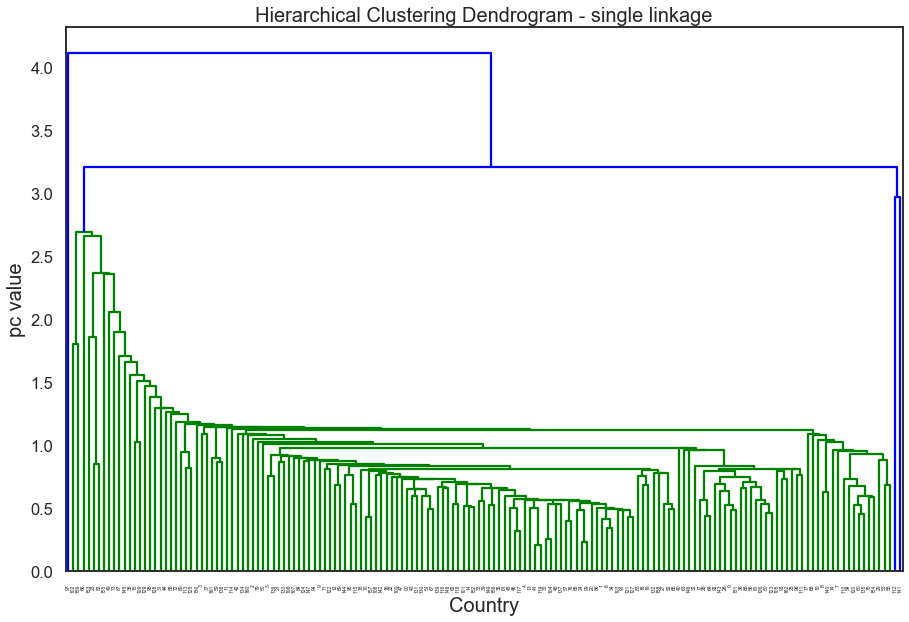

In [106]:
# First we will try with single linkage

# setting the figure and graph style

plt.figure(figsize=(15,10))
sns.set_style('white')

# setting the labels on axes and title

plt.title('Hierarchical Clustering Dendrogram - single linkage',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('pc value',fontsize=20)

single_linkage1=linkage(scaled_hierdf_1,method='single',metric='euclidean')   # single linkage
dendrogram(single_linkage1,labels=scaled_hierdf_1.index)                      # creating dendrogram
plt.show()                                                                # plot showing

##### It's not clearly visible in single linkage dendogram hence we will go for complete linkage which gives us proper results.

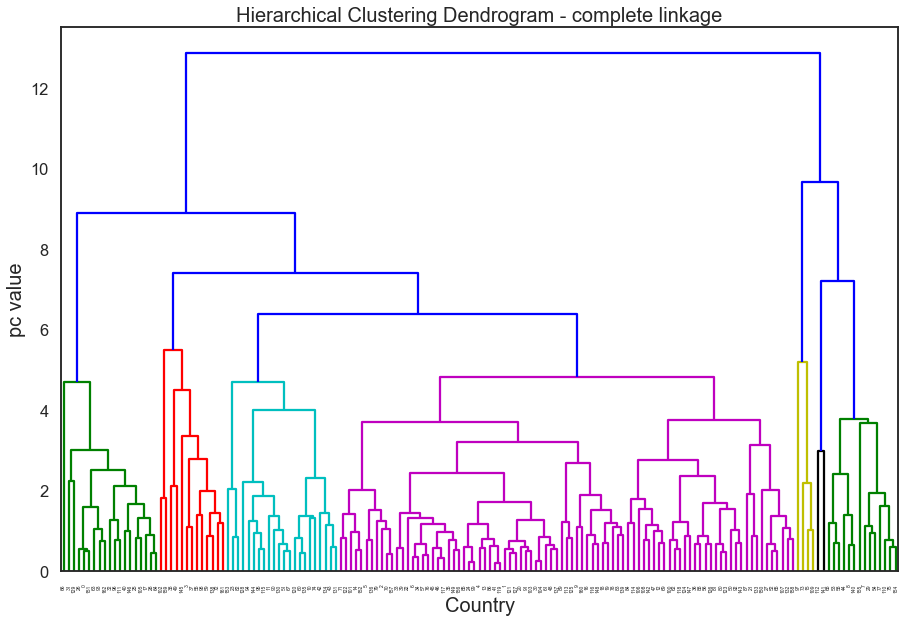

In [107]:
# Complete linkage

plt.figure(figsize=(15,10))             # Setting the size of the figure
sns.set_style('white')                  # Setting style

# setting the labels on axes and title

plt.title('Hierarchical Clustering Dendrogram - complete linkage',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('pc value',fontsize=20)

complete_linkage1=linkage(scaled_hierdf_1,method='complete',metric='euclidean')                             # single linkage
dendrogram(complete_linkage1,above_threshold_color='blue',color_threshold=5.5,labels=scaled_hierdf_1.index) # creating dendrogram

plt.show()                                                                                              # plot showing

In [108]:
# 3 clusters

cluster_label1=cut_tree(complete_linkage1,n_clusters=3).reshape(-1, )

cluster_label1

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0])

In [109]:
# Asssigning the cluster labels to the dataset(countries)

scaled_hierdf_1['Cluster_label']=cluster_label1

scaled_hierdf_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_label
0,1.303466,-1.319031,-0.562023,-0.648685,-0.503298,0.289329,-1.612381,1.911315,-0.702455,0
1,-0.545781,-0.508144,-0.431204,-0.422310,-0.455173,-0.370665,0.666389,-0.870331,-0.483620,0
2,-0.276937,-0.039632,-0.478624,-0.498742,-0.434674,1.177320,0.689063,-0.043175,-0.460727,0
3,2.027084,1.037045,-0.528049,-0.483915,-0.479145,2.017312,-1.170232,2.138116,-0.518267,0
4,-0.704073,0.280218,-0.160414,0.254178,-0.222070,-0.777327,0.723074,-0.550142,0.018150,0


## Visualising the original variables for hierarchical clustering - Approach 2¶

In [110]:
new_cntry_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id
country,,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,0
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,1
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,1
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,155.9250,1565.190,87615.0,2.62,63.0,3.50,2970,1
Venezuela,17.1,28.5,662.8500,2376.000,2227500.0,45.90,75.4,2.47,13500,1
Vietnam,23.3,72.0,89.6040,1050.620,58819.0,12.10,73.1,1.95,1310,1


In [111]:
# Analysing cluster by comparing [gdpp,child_mort and income] - how they vary in hierarchical clustering 

cntry_df_hier1=new_cntry_df.drop('Cluster_id',1)    # creating separate dataset for hierarchical cluster analysis

# Imputing the new hierarchical clusters in the dataset

cntry_df_hier1['Cluster_level']=cluster_label1

cntry_df_hier1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_level
country,,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,0
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,0


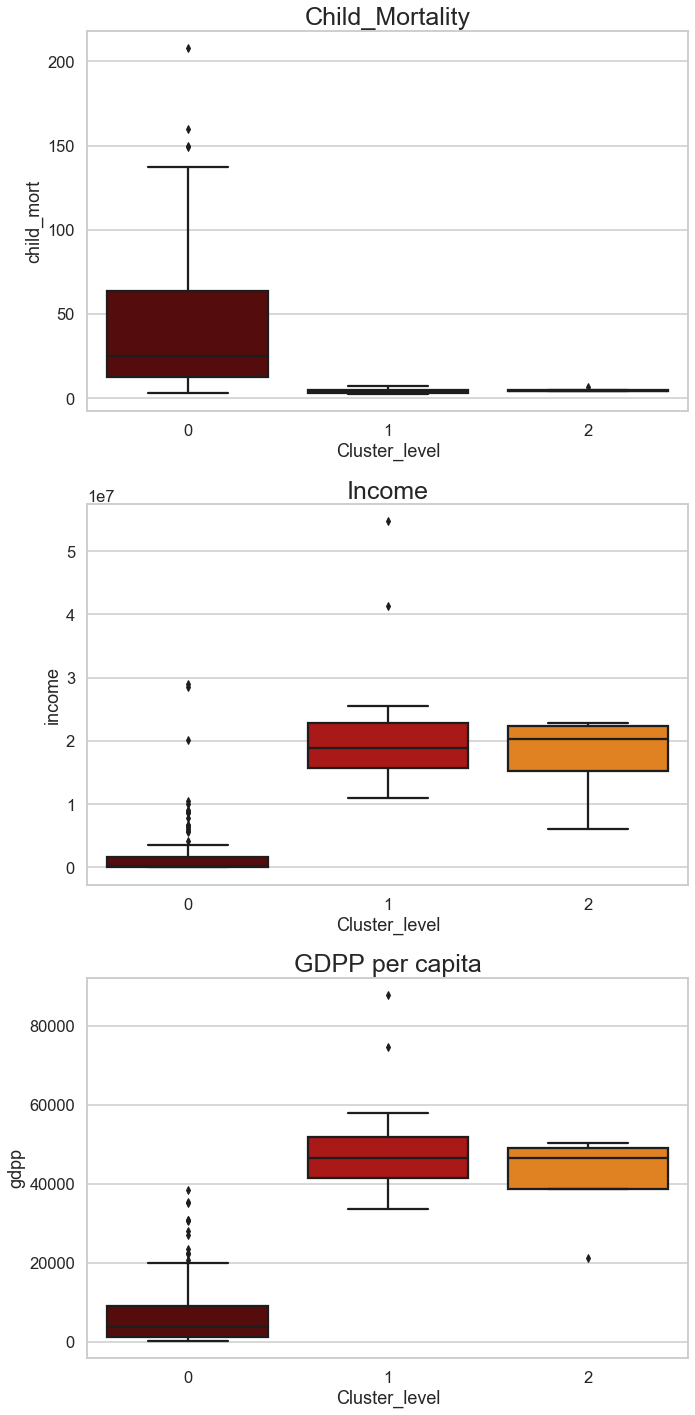

In [112]:

# Setting size of figure, context and gridlines

plt.figure(figsize=(10,20))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')


# Visualising the outliers with boxplot for child_mort, income and gdpp variables 



plt.subplot(3,1,1)                          # creating subplots
plt.title('Child_Mortality',fontsize=25)   # giving title with font size

# creating boxplot

sns.boxplot(x=cntry_df_hier1['Cluster_level'],y=cntry_df_hier1['child_mort'],data=cntry_df_hier1,palette='gist_heat',orient='v',fliersize=5)

plt.subplot(3,1,2)                         # creating subplots
plt.title('Income',fontsize=25)            # giving title with font size

# creating boxplot
sns.boxplot(x=cntry_df_hier1['Cluster_level'],y=cntry_df_hier1['income'],data=cntry_df_hier1,palette='gist_heat',orient='v',fliersize=5)

plt.subplot(3,1,3)                           # creating subplots
plt.title('GDPP per capita',fontsize=25)       # giving title with font size

# creating boxplot
sns.boxplot(x=cntry_df_hier1['Cluster_level'],y=cntry_df_hier1['gdpp'],data=cntry_df_hier1,palette='gist_heat',orient='v',fliersize=5)
             
plt.tight_layout()                      # setting the layout for better visual
  

**Valuable Insights from above three boxplots :**
- For cluster 0: .gdpp and income is the lowest than others clusters, Mortality of children is very high than other clusters.
- For cluster 1: gdpp and income is having decent low value, mortality of children is very less in here
- For cluster 2: gdpp and income is higher than others clusters, Mortality of children is very less compared to other clusters

In [118]:
cntry_df_hier1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_level
country,,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,0
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,0


In [119]:
cntry_df_hier1.Cluster_level.value_counts()

0    143
1     16
2      4
Name: Cluster_level, dtype: int64

Here, we got **143 countries** which are in need of aid as they have having low income, high child mortality and low gdp per capita.

Here, we got **4 countries** which are having good social-economic and health factors.

# Conclusion - Approach 2

## K-Means vs Hierarchical Clustering

**K-means clustering :**
- Countries that are direst need of aid
 - Total **47 countries** are in this category

**Hierarchical clustering :**
- Countries that are direst need of aid
 - Total **143 countries** are in this category

We have seen from both methods - **(K-Means and Hierarchical clustering)** that extra 96 countries are being selected from hierarchical clustering. I would choose the final countries from **k-means clustering** as it gave **accurate** output than hierarchical clustering. I have compared the clusters and visualized from both methods and K-means gave **precise** information than hierarchical clustering.

# Final Conclusion

Among the two conclusion drawn from approach 1 i.e. including ouliers and approach 2 i.e. excluding outliers, **approach 1** is the appropriate choice because it includes all the data points including outliers.
As per the business requirements, we have to find all the countries which are in direst need of aid i.e. the countries which are having low socio-economic and health factors. Hence we can't exclude any countries from our dataset as it will create a major drawback in our model.
For example: let's take an outlier country 'Nigeria' which is having low socio-economic and health factors. If we exclude this outlier from my dataset, we will miss our main objective as it happened with approach 2. So, even though the model was greater than the previous model, we can't use it as it doesn't suits the business needs.
Selecting approach 2 means we have to loose many countries in process which is not ideal from business prespective.

##### Analysis of the clusters:

Analysis of k means from Approach 1

In [124]:
child_mort_mean = 	pd.DataFrame(cntry_df.groupby(["Cluster_id"]).child_mort.mean())
exports_mean= 	pd.DataFrame(cntry_df.groupby(["Cluster_id"]).exports.mean())
health_mean = 	pd.DataFrame(cntry_df.groupby(["Cluster_id"]).health.mean())
imports_mean = 	pd.DataFrame(cntry_df.groupby(["Cluster_id"]).imports.mean())
income_mean = 	pd.DataFrame(cntry_df.groupby(["Cluster_id"]).income.mean())
inflat_mean = 	pd.DataFrame(cntry_df.groupby(["Cluster_id"]).inflation.mean())
life_expec_mean = 	pd.DataFrame(cntry_df.groupby(["Cluster_id"]).life_expec.mean())
total_fer_mean = 	pd.DataFrame(cntry_df.groupby(["Cluster_id"]).total_fer.mean())
gdpp_mean = 	pd.DataFrame(cntry_df.groupby(["Cluster_id"]).gdpp.mean())

In [125]:
country_analysis_df = pd.concat([pd.Series([0,1,2,3]),child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflat_mean,life_expec_mean,
                                 total_fer_mean,gdpp_mean], axis=1)

In [126]:
country_analysis_df.columns = ["ClusterID","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
country_analysis_df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,20.918182,41.162375,482.897845,3461.435467,1.449034e+06,7.295045,73.222727,2.242159,7332.636364
1,1,5.082759,49.948276,4084.970000,18129.900000,2.165539e+07,2.837690,80.403448,1.813793,44017.241379
2,2,91.610417,29.571042,114.821765,827.028771,2.307380e+05,11.911146,59.239583,4.992083,1909.208333
3,3,2.800000,187.500000,5001.930000,115092.000000,6.494180e+07,1.787000,82.000000,1.390000,75800.000000


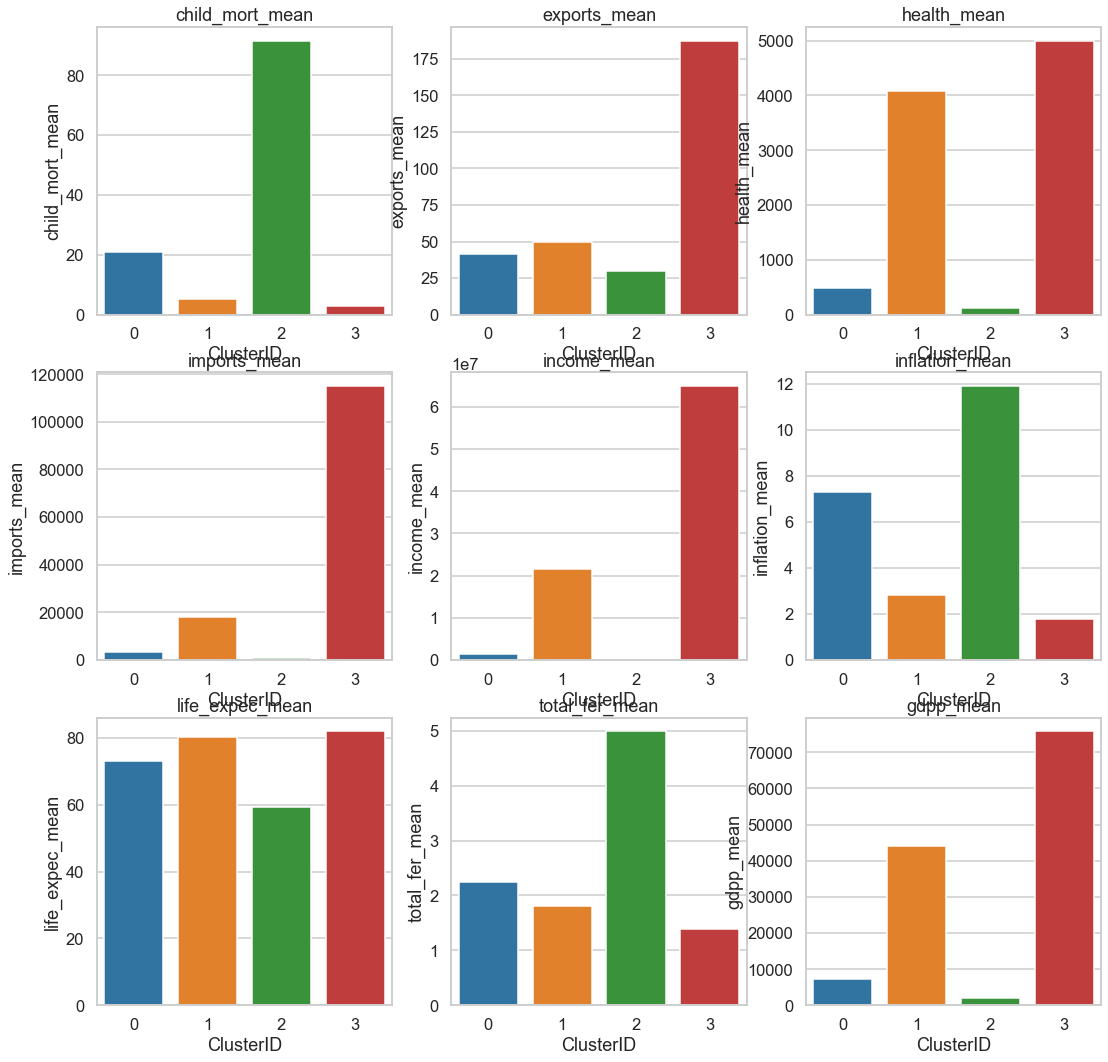

In [127]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.child_mort_mean)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.exports_mean)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.health_mean)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.imports_mean)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.income_mean)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.inflation_mean)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.life_expec_mean)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.total_fer_mean)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.gdpp_mean)

plt.show()

Looking at the graph we are certain that cluster 2 is our cluster of concern. Because:
    1. It has highest child mortality
    2. Lowest income
    3. Highest Inflation
    4. Compartively low life expectancy 
    5. Highest total fertility 
    6. Lowest gdpp.

In [129]:
#Let us bin our cluster 2
cluster_km=cntry_df[cntry_df['Cluster_id']==2]
cluster_km.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id
26,Burundi,93.6,8.92,26.7960,90.552,1764.84,12.30,57.7,6.26,231,2
88,Liberia,89.3,19.10,38.5860,302.802,2289.00,5.47,60.8,5.02,327,2
37,"Congo, Dem. Rep.",116.0,41.10,26.4194,165.664,2034.06,20.80,57.5,6.54,334,2
112,Niger,123.0,22.20,17.9568,170.868,2832.72,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,16.80,52.2690,137.655,4867.80,17.20,55.0,5.20,399,2
93,Madagascar,62.2,25.00,15.5701,177.590,5740.70,8.79,60.8,4.60,413,2
106,Mozambique,101.0,31.50,21.8299,193.578,3846.42,7.64,54.5,5.56,419,2
31,Central African Republic,149.0,11.80,17.7508,118.190,3960.48,2.01,47.5,5.21,446,2
94,Malawi,90.5,22.80,30.2481,160.191,4727.70,12.10,53.1,5.31,459,2
50,Eritrea,55.2,4.79,12.8212,112.306,6844.40,11.60,61.7,4.61,482,2


As per K- means clustering, the country which are direst need of aid are:
    1. Burundi
    2. Liberia
    3. Congo, Dem. Rep
    4. Niger
    5. Sierra Leone
    6. Madagascar
    7. Mozambique
    8. Central African Republic
    9. Malawi
    10.Eritrea

##### Analysis of the clusters:

Analysis of Heirarchical Clustering from Approach 1

In [130]:
cntry_df_hier1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_level
country,,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,0
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,0


In [131]:

child_mort_mean_hc = 	pd.DataFrame(cntry_df_hier1.groupby(["Cluster_level"]).child_mort.mean())
exports_mean_hc= 	pd.DataFrame(cntry_df_hier1.groupby(["Cluster_level"]).exports.mean())
health_mean_hc = 	pd.DataFrame(cntry_df_hier1.groupby(["Cluster_level"]).health.mean())
imports_mean_hc = 	pd.DataFrame(cntry_df_hier1.groupby(["Cluster_level"]).imports.mean())
income_mean_hc = 	pd.DataFrame(cntry_df_hier1.groupby(["Cluster_level"]).income.mean())
inflat_mean_hc = 	pd.DataFrame(cntry_df_hier1.groupby(["Cluster_level"]).inflation.mean())
life_expec_mean_hc = 	pd.DataFrame(cntry_df_hier1.groupby(["Cluster_level"]).life_expec.mean())
total_fer_mean_hc = 	pd.DataFrame(cntry_df_hier1.groupby(["Cluster_level"]).total_fer.mean())
gdpp_mean_hc = 	pd.DataFrame(cntry_df_hier1.groupby(["Cluster_level"]).gdpp.mean())

In [134]:
country_analysis_df_hc= pd.concat([pd.Series([0,1,2]),child_mort_mean_hc,exports_mean_hc,health_mean_hc,imports_mean_hc,income_mean_hc,inflat_mean_hc,life_expec_mean_hc,
                                 total_fer_mean_hc,gdpp_mean_hc], axis=1)

In [135]:
country_analysis_df_hc.columns = ["ClusterID","child_mort_mean_hc","exports_mean_hc","health_mean_hc","imports_mean_hc","income_mean_hc","inflation_mean_hc","life_expec_mean_hc","total_fer_mean_hc","gdpp_mean_hc"]
country_analysis_df_hc

,ClusterID,child_mort_mean_hc,exports_mean_hc,health_mean_hc,imports_mean_hc,income_mean_hc,inflation_mean_hc,life_expec_mean_hc,total_fer_mean_hc,gdpp_mean_hc
0,0,43.056643,37.939154,442.373106,3123.973301,1.817808e+06,8.068007,68.961538,3.118042,6893.594406
1,1,4.337500,35.806250,5298.968125,16651.793750,2.183081e+07,1.746812,80.993750,1.792500,49406.250000
2,2,5.000000,101.100000,4259.295000,34944.275000,1.734052e+07,0.834500,80.350000,1.765000,41125.000000


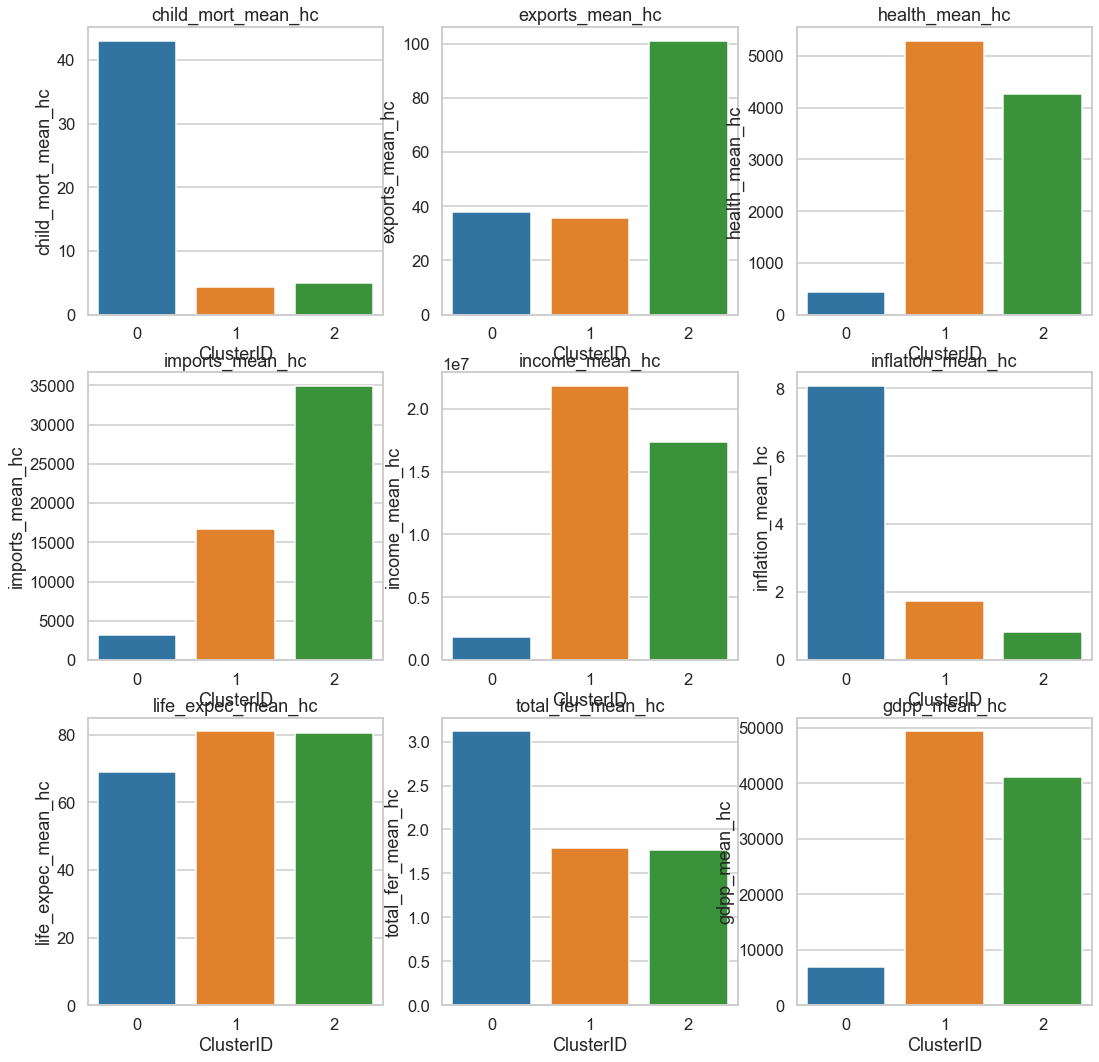

In [136]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.child_mort_mean_hc)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.exports_mean_hc)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.health_mean_hc)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.imports_mean_hc)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.income_mean_hc)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.inflation_mean_hc)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.life_expec_mean_hc)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.total_fer_mean_hc)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.gdpp_mean_hc)

plt.show()

Looking at the graph we are certain that cluster 0 is our cluster of concern. Because:
1. It has highest child mortality
2. Lowest income
3. Highest Inflation
4. Compartively low life expectancy 
5. Highest total fertility 
6. Which all in turn leads to lowest gdpp.

In [138]:
#Let us bin our cluster 0
cluster_hc=cntry_df_hier1[cntry_df_hier1['Cluster_level']==0]
cluster_hc.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_level
country,,,,,,,,,,
Burundi,93.6,8.92,26.7960,90.552,1764.84,12.30,57.7,6.26,231,0
Liberia,89.3,19.10,38.5860,302.802,2289.00,5.47,60.8,5.02,327,0
"Congo, Dem. Rep.",116.0,41.10,26.4194,165.664,2034.06,20.80,57.5,6.54,334,0
Niger,123.0,22.20,17.9568,170.868,2832.72,2.55,58.8,7.49,348,0
Sierra Leone,160.0,16.80,52.2690,137.655,4867.80,17.20,55.0,5.20,399,0
Madagascar,62.2,25.00,15.5701,177.590,5740.70,8.79,60.8,4.60,413,0
Mozambique,101.0,31.50,21.8299,193.578,3846.42,7.64,54.5,5.56,419,0
Central African Republic,149.0,11.80,17.7508,118.190,3960.48,2.01,47.5,5.21,446,0
Malawi,90.5,22.80,30.2481,160.191,4727.70,12.10,53.1,5.31,459,0


As per Heirarchical Clustering, the country which are direst need of aid are:
    1. Burundi
    2. Liberia
    3. Congo, Dem. Rep
    4. Niger
    5. Sierra Leone
    6. Madagascar
    7. Mozambique
    8. Central African Republic
    9. Malawi
    10.Eritrea

We got same countries by both K-means and Heirarchical Clustering: 
Therefore following are the countries which are in direst need of aid by considering socio–economic factor into consideration:

    1. Burundi
    2. Liberia
    3. Congo, Dem. Rep.
    4. Niger
    5. Sierra Leone
    6. Madagascar
    7. Mozambique
    8. Central African Republic
    9. Malawi
    10. Eritrea